#  <center> Mathematical & Statistical Course - Part I - Problem Set 2

### <center> Reza Pourkhodabakhshi

<center> Project's Supervisor : Prof. Lluis Garrido

# 1. Generation of $N=10000$ events based on $f_0(x)$


The angular distribution of the process $e^+ e^-$ → $μ^+ \;μ^-$ is given by:

<center>$f(θ,φ)\;dΩ =\displaystyle\frac{1 \;+\; α \;cosθ \;+ \;β \;cos^2 θ}{2 \;+ \frac{2β}{ 3}}dΩ$

Generate 10 000 events according to the distribution $f_0(x)= \frac{3}{4} (1+x^2)$ , $-1≤ x ≤1$
 
- Calculate the p-value of the generated data with respect to $f_0(x)$
- Repeat the previous step 1000 times and show the distribution of the p-value

Assume that nature follows the $f_0(x)$ distribution and we have a model that predicts $f(x; A) = \frac{3}{4}(1 + x^2 + Ax)$ where $A$ is a parameter that should be determined experimentally from a set of measurements ${x_i, i = 1, N}$
    

For generating N events following $f_0(x)$, the $\textbf{Von Neumann's method}$ has been used.

- Generating 10 000 events according to the distribution $f_{0}(x)$

In [1]:
#imports
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chisquare
import math
import pandas as pd

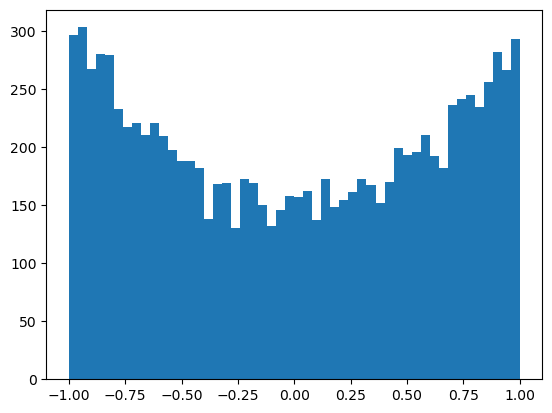

In [40]:
Nbins = 50 #nº of bins

#Defining the CDF of the distribution function:
def f0_CDF(x):
    return (- np.power((-4*x + np.sqrt(4*(2*x-1)**2 + 1) + 2), 2/3) + 1)/np.power((-4*x + np.sqrt(4*(2*x-1)**2 + 1) + 2), 1/3)

# Compute 10 000 events according given
f_0=[]
for i in range(10000):
    f_0.append(f0_CDF(np.random.uniform()))

#created a histogram with the dataset just computed
histogram = plt.hist(f_0, bins=Nbins);

# 2. Calculation of the p-value of the data w.r.t $f_0(x)$, and its distribution

We now calculate the p-value of the generated set of data with respect to $f_0(x)$ through a $\chi^2$ distribution.$\newline$
The inputs for the $\chi^2$ test are both the number of events from our sample that fall into each bin and the expexted number of events that would fall into each bin if the sample data actually followed a $f_0(x)$ distribution.

Furthermore, we repeat the generation of the sample ___1000___ times and calculate the p-value for each sample. We plot the distribution of p-values: if the generated data actually follows $f_0(x)$, $\textbf{the distribution of the p-values will be flat}$ (will be uniformly distributed throughout the bins).$\newline \newline$

- Calculating the p-value for the computed data with respect to $f_{0}(x)$

In [41]:
#histogram[1] = histogram borders distance
borders = histogram[1]

# As 1 bin equals to the distance between two borders:
window = 2 

#for each pair you calculate the integral 
def integral (x1, x2):
    return abs((x1**3 + 3*x1)/8 - (x2**3 + 3*x2)/8)

hist_pdf = []

for i in range(len(borders) - window + 1):
    x1, x2 = borders[i: i + window]
    hist_pdf.append(integral(x1, x2))  

hist_pdf = np.array(hist_pdf)
hist_pdf *= (10000/sum(hist_pdf))

exp_distrib = hist_pdf
obs_distrib = histogram[0]

chi2, pvalue = chisquare(obs_distrib, exp_distrib)
pvalue

0.5116740786425248

We obtained the P-Value as

<center> $$\text{P-value } \approx 0.512$$

- The earlier step will be repeated 1000 times to show the p-value distribution with the objective of showing the p-value distribution. 

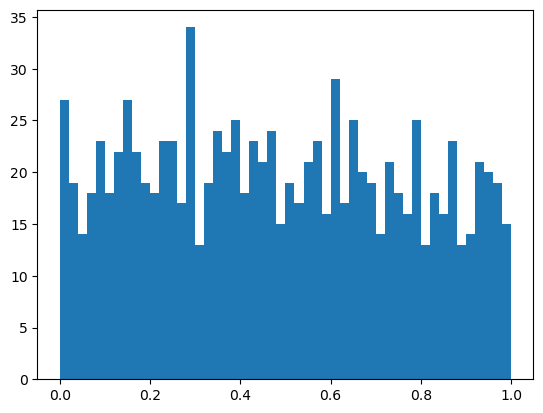

In [42]:
pvalues = []

for i in range(1000):
    f_0=[]
    for i in range(10000):
        f_0.append(f0_CDF(np.random.uniform()))
    hist = np.histogram (f_0, bins = Nbins)
    
    borders = hist[1] 
    
    hist_pdf = []

    for i in range(len(borders) - window + 1):
        x1, x2 = borders[i: i + window]
        hist_pdf.append(integral(x1, x2)) 
    
    hist_pdf = np.array(hist_pdf)
    hist_pdf *= (10000/sum(hist_pdf))
    obs_distrib = hist[0]
    chi2, pvalue = chisquare(obs_distrib, exp_distrib)
    
    pvalues.append(pvalue)

plt.hist(pvalues, bins= Nbins);
    

As it can be observed in the histogram above the p-value distribution is shown to be approximately flat. 

Assume that nature follows the $f_0(x)$ distribution and we have a model that predicts
\begin{equation}
f(x;A)=\frac{3}{4}(1+x^2+Ax)
\end{equation}
where A is a parameter that should be determined experimentally from a set of measurements $\{x_i, i = 1,...,N\}$ .$\newline \newline$

Indeed, we see a flat distribution for the p-values, which was expected since the data have been generated to follow the distribution $f_0(x)$ itself.

#     

#  

# 3. Toy model distribution $f(x;A)$

We asume nature follows the $f_0(x)=\frac{3}{8}(1+x^2)$ distribution, and we model it with the following distribution:
$$f(x;A)=\frac{3}{8}(1+x^2+Ax)$$ 

where A is a parameter that should be determined experimentally from our set data.

## 3.1. Finding the MVB for the estimation of A
The MVB (Minimum-Variance Biased estimator) when estimating A is defined as a function of the $\textbf{Fisher information}$, $\mathbf{I_N}$:

$$MVB=\frac{1}{I_N}\,\,\,;\,\,\,I_N(A)=-E\left[\frac{\partial^2\log L(\vec{x}|A)}{\partial A^2}\right]$$
The likelihood $L(\vec{x}|A)$ is defined as:
$$L(\vec{x}|A)=\prod_{i=1}^N f(x_i;A)$$
Using the fact that $I_N=N I_x$, we can compute the Fisher information for a single $x_i$ and extrapolate from it the likelihood of the whole set of data. 

We start with:
$$\log L(x_i|A)=\log \frac{3}{8}+\log(1+x^2+Ax)\rightarrow$$


$$\rightarrow\,\frac{\partial^2\log L(x_i|A)}{\partial A^2}=\frac{-x^2}{(1+x^2+Ax)^2} \,;$$


$$I_x=-E\left[\frac{\partial^2\log L(x_i|A)}{\partial A^2}\right]=-\int_{-1}^1 dx\,\left(\frac{-x^2}{(1+x^2+Ax)^2}\right)\cdot \frac{3}{8}(1+x^2+Ax)=$$

$$=\frac{3}{8}\int_{-1}^1 dx\,\frac{x^2}{1+x^2+Ax}\approx \frac{3}{8}\left[\int_{-1}^1dx\,\frac{x^2}{1+x^2}-\overbrace{\int_{-1}^1dx\,\frac{x^3}{(1+x^2)^2}A}^{\equiv 0}\right]+O(A^2)=\newline=\frac{3}{8}\left(2-\frac{\pi}{2}\right)\approx 0.161$$

Finally, we get the expression for our MVB, for which we also calculate the numerical value in for our specifica case of $N=10000$ events;

$$MVB=\frac{1}{I_N}=\frac{1}{NI_x}\approx \frac{6.213}{N}\approx 6.2\cdot 10^{-5}$$

The square root of this value gives the standard deviation of the parameter $A$:

$$\Delta A=\sqrt{MVB}\approx 0.0249$$

We will recover this result through the graphical maximum likelihood method for estimating $A$ and $\Delta A$.

## 3.2. Analytical expression to determine Â:  Max. likelihood method

We define the following function: 
$$\xi(A)=\frac{1}{N}\sum_{i=1}^N\frac{\partial}{\partial A}\log f(x_i|A)=\frac{1}{N}\frac{\partial}{\partial A}\log f(\vec{x}|A)=$$

$$=\frac{1}{N}\frac{\partial}{\partial A}\log \left(\prod_{i=1}^N\frac{3}{8}(1+x_i^2+Ax_i)\right)=\frac{1}{N}\frac{\partial}{\partial A}\sum_{i=1}^N\log\left(\frac{3}{8}(1+x_i^2+Ax_i)\right)=$$

$$=\frac{1}{N}\sum_{i=1}^N\frac{\partial}{\partial A}\left[\log\left(\frac{3}{8}(1+x_i^2+Ax_i)\right)\right]=\frac{1}{N}\sum_{i=1}^N \frac{x_i}{1+x_i^2+Ax_i}$$

We now use the maximum likelihood method by maximizing $\log L(\vec{x}|A)$ imposing $\xi(A)=0\,\,\Rightarrow\,L(\vec{x}|\hat{A})\geq L(\vec{x}|A)$. $\newline$
We take $\hat{A}$ small and expand the sum:

$$\xi(A)=\sum_{i=1}^N \frac{x_i}{1+x_i^2+Ax_i}\approx \sum_{i=1}^N \left(\frac{x_i}{1+x_i^2}-\frac{x_i^2}{(1+x_i^2)^2}A+\dots\right)=0\,\,\newline \Rightarrow\,\,\boxed{\hat{A}=\frac{\sum_{i=1}^N \frac{x_i}{1+x_i^2}}{\sum_{i=1}^N \frac{x_i^2}{(1+x_i^2)^2}}}$$

$\newline \newline \newline \newline \newline \newline \newline \newline \newline \newline \newline \newline \newline \newline \newline$

$$\newline \newline \newline \newline \newline$$

$$\newline \newline \newline \newline \newline$$

$$\newline \newline \newline \newline \newline$$

$$\newline \newline \newline \newline \newline$$

#      

# 

# 4. Fitting of generated data to $f(x;A)$ as a way of determining $\hat{A}\pm\Delta\hat{A}$ 

# $\bullet$ Numerical Method

#### · Generate $ N = 10000$ events according to the distribution $f_0(x)$ and fit this data with $f(x;A)$ to determine the value of A and its error $∆A$ (use the numerical/graphical method to the likelihood).

In [44]:
#OBJECTIVE: Need to find the A that minimizes the log of the likelihood
#generate distribution
x = np.array([f0_CDF(np.random.uniform()) for i in range(10000)])
                      
#Create an array of the generated A's values
As = np.linspace(-0.5,0.5, 1500)

#Defining the function that the model predicts, the onle that determines the parameter A
def f_A(x, A):
    return 3/8 * (1 + x**2 + x*A)

#for each A we find the log likelihood
#x value does not vary on the different A's
LogLikely = []
for A in As: 
    Log_Like = np.sum(np.log(f_A(x,A)))
    LogLikely.append(Log_Like)
#Calculating the max A value by checking each individual A's index
max_index_val = LogLikely.index(max(LogLikely))
maxA = As[max_index_val]

#To find the error create a line at (max - 0.5) and see where it fits the line 
#however, its not easy to establish where it intercepts

##############################################################################################
#Define a function that finds the error for A:

def A_ErrorCalculator(DistribFunction, LL):
#Spliting the function into 2  equal parts, the left side and right side side
    upper_sec = DistribFunction[DistribFunction['LL'] >= (max(LL)-0.5)] 
    lower_sec = DistribFunction[DistribFunction['LL'] < (max(LL)-0.5)] 

#Only considering the left side of the log likelihood graph (=side with A<Amax)
    upper_sec = upper_sec.sort_values(by='LL').head(1)
    lower_sec = lower_sec.sort_values(by='LL').tail(1)

    x_high = upper_sec.LL.values[0]
    x_low = lower_sec.LL.values[0]
#Split the left side of the graph in the section above/below (LogLikelihood - 0.5)
    point = ((max(LL)-0.5)  - x_high)/(x_high - x_low)
#Finding the point that is closest to the LogLikelihood -0.5 (from above and from below):
    x_high = upper_sec.A.values[0]
    x_low = lower_sec.A.values[0]
#Returns the x-position that indicates the difference between the Amax and the error
    return point*(x_high - x_low) + x_low

##############################################################################################


#Calculating the error: 
DistribFunc = pd.DataFrame({'A': As, 'LL': LogLikely})

#creates a table where for each A you also have the likelihood 
# + split the table by half to calculate the error in the left and in the right side of the Log Likelihood graph
error_L = abs(maxA - A_ErrorCalculator(DistribFunc[DistribFunc['A'] < maxA], LogLikely))
error_R = abs(maxA - A_ErrorCalculator(DistribFunc[DistribFunc['A'] > maxA], LogLikely)) #select the A for which the log likelyhood is max
error_A = (error_L + error_R)/2

#find which point is the closest above and below (so get 2)
print("The value of A is", maxA, " with an error ∆A of", error_A)

The value of A is 0.002334889926617678  with an error ∆A of 0.025619510957858433


Using the numerical method we obtain
\begin{equation}
    \hat{A}=0.00233\pm 0.02561
\end{equation}

# $\bullet$ Graphical Method

We find $A$ that maximizes the likelihood through the expression found before:
$\hat{A}=\frac{\sum_{i=1}^N \frac{x_i}{1+x_i^2}}{\sum_{i=1}^N \frac{x_i^2}{(1+x_i^2)^2}}$. $\newline$

We then find $\Delta \hat{A}$ through "graphically" finding the value of $A$ for which we get $\log L(max)-\frac{1}{2}$. This value will be $\hat{A}\pm \sigma_A$.

This result comes from (taking $n\rightarrow \infty$): $\log L(\vec{x}|A)\rightarrow \log L(max)-\frac{1}{2}Q\,\,\,;\,\,\textrm{where}:\,\,Q\equiv \left(\frac{\hat{A}-A_0}{\sigma_A}\right)$

A_max = 0.00608301933633093
sigma+ = 0.025075075075075073


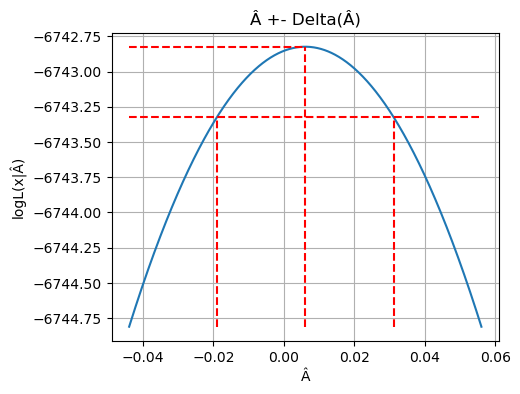

In [46]:
import math as m
def f(x):
    return (3./8)*(1+x**2)  

maxf=3./4. 
N=10000
sizeA=0.05
N_A=1000
#Observed distribution generation
values=[]  
i=0
while i<N:
    a=np.random.uniform(0,1)
    x=2*a-1 #Generate x in (-1,1)
    b=np.random.uniform(0,1) 
    y=b*maxf #Generate y in (0,max(f))
    if y<f(x):
        values.append(x)
        i=i+1
        
#A_max generation
a=0
b=0
for k in range (0,N):
    b=b+((values[k]/(1+values[k]**2))**2)
    a=a+(values[k]/(1+values[k]**2))
A_max=a/b
print('A_max =',A_max)
#Generation of values of logL once A_max has been generated
Apoints=np.linspace(A_max-sizeA,A_max+sizeA,N_A)
logL_val=[]
for j in range (0,N_A):
    logL=0
    for k in range (0,N):
        logL=logL+m.log(3./8)+m.log(1+(values[k])**2+Apoints[j]*values[k])
    logL_val.append(logL)

#Search for the error Delta(A), graphical method: midL=logL_max-(1/2) --> Amid
midL=max(logL_val)-0.5
diff_vals=[]
for j in range (0,N_A):
    testL=0
    for k in range (0,N):
        testL=testL+m.log(3./8)+m.log(1+(values[k])**2+Apoints[j]*values[k])
    diff=abs(testL-midL)
    diff_vals.append(diff)   
    
Amid=Apoints[diff_vals.index(min(diff_vals))]   #A_mid
sigma_p=abs(A_max-Amid) #Differences: ACTUAL error Delta(A)
print('sigma+ =',sigma_p)

#Plotting
f = plt.figure()
f.set_figwidth(5)
f.set_figheight(4)
plt.plot(Apoints,logL_val)
plt.plot((A_max,A_max), (min(logL_val), max(logL_val)), '--r') #vertical A
plt.plot((Apoints[0],A_max), (max(logL_val), max(logL_val)), '--r') #horizontal Lmax
plt.plot((Apoints[0],Apoints[N_A-1]), (midL, midL), '--r') #horizontal Lmax/2
plt.plot((A_max-sigma_p,A_max-sigma_p), (min(logL_val), midL), '--r') #vertical A-Delta(A)
plt.plot((A_max+sigma_p,A_max+sigma_p), (min(logL_val), midL), '--r') #vertical A+Delta(A)
plt.xlabel('Â')
plt.ylabel('logL(x|Â)')
plt.title('Â +- Delta(Â)')
plt.grid()

We see that the estimated $A$ is around the value 0, with some statistical error $\hat{A}\sim 0$.

We also see that the standard deviation of the estimator for $A$ is $\sigma_A\approx 0.02497$, which $\textbf{coincides}$ with the value calculated before: $\Delta A=\sqrt{MVB}\approx 0.0251$. We can say the estimation has been farely exact.

#   

# 5. Distributions for $\hat{A}$ and $\Delta\hat{A}$ after 500 iterations

#### · Repeat the previous step 500 times and show the distributions for $\hat{A}$ and $∆\hat{A}$. Discuss the results. 

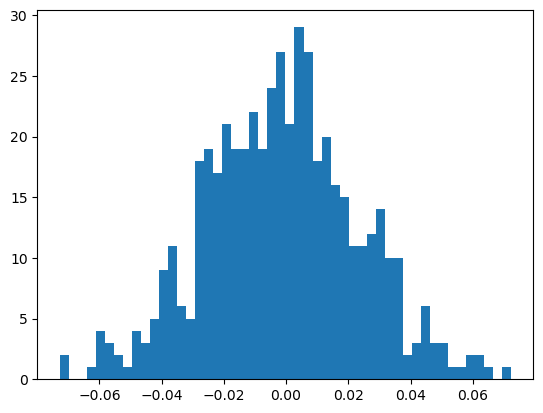

In [47]:
#Create 2 arrays: 1 for the A's and 1 for the A's errors
Alist = []
Aerror = []

As = np.linspace(-0.3,0.3, 1500)


#Repeat the above process 500 times:
for i in range(500):
    x = np.array([f0_CDF(np.random.uniform()) for i in range(10000)])
                  
    LogLikely = []
    for A in As: 
        Log_Like = np.sum(np.log(f_A(x,A)))
        LogLikely.append(Log_Like)
                      
    max_index_val = LogLikely.index(max(LogLikely))
    maxA = As[max_index_val]
    
    DistribFunc = pd.DataFrame({'A': As, 'LL': LogLikely}) 
    error_L = abs(maxA - A_ErrorCalculator(DistribFunc[DistribFunc['A'] < maxA], LogLikely))
    error_R = abs(maxA - A_ErrorCalculator(DistribFunc[DistribFunc['A'] > maxA], LogLikely)) 
    error_A = (error_L + error_R)/2                
    
    Alist.append(maxA)
    Aerror.append(error_A)

plt.hist(Alist, bins = 50);

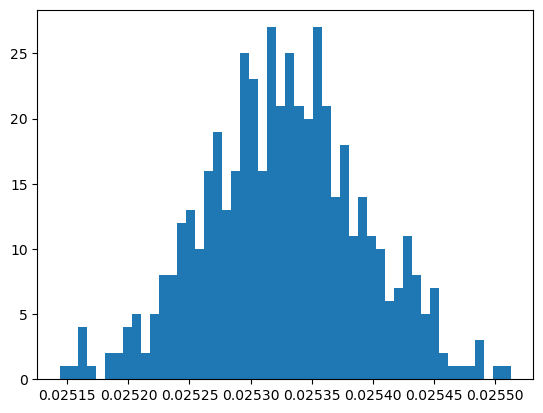

In [48]:
plt.hist(Aerror, bins=50);

We see both distributions are gaussians centered around their estimated values. These distributions are a graphical representation of the variance of the estimator of $A$; $\textrm{Var}[\hat{A}]$ and the variance of the estimator of the variance of $A$; $\textrm{Var}[\Delta\hat{A}]$

#  

# 6. Calculation of p-value for each experiment w.r.t $f(x;A)$. Distribution of p-values

For each iteration of the earlier procedure, we can calculate the p-value with respect to the estimated distribution $f(x;A)$ and plot its distribution. If the estimated parameter were in fact $\hat{A}\approx 0$, the p-values' distribution would be flat; our model would agree with the null hypothesis that nature follows $f_0(x)\sim f(x;\hat{A}\approx 0)$. 

We proceed to plot the p-values' distribution:

#### · For each one of the 500 previous experiments calculate the p-value of the data respect $f(x;A)$. Show the distribution of the p-value. 

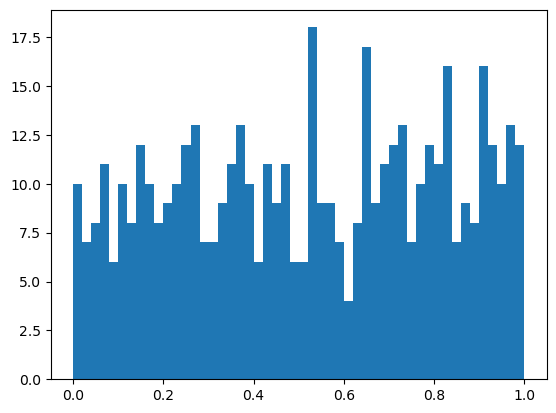

In [49]:

A_PvalueList = []

As = np.linspace(-0.5, 0.5, num=1500)

for i in range(500):
    x = np.array([f0_CDF(np.random.uniform()) for i in range(10000)])
    
    Log_Like_Max = -np.inf
    maxA = None
    
    LogLikely = []
    
    for A in As: 
        Log_Like = np.sum(np.log(f_A(x,A)))
        LogLikely.append(Log_Like)

    max_index_val = LogLikely.index(max(LogLikely))
    maxA = As[max_index_val]
    
    def Func(x, A):
        return -((54*A**3 + np.sqrt((54*A**3 - 648*A - 1728*x + 864)**2 + 4*(36 - 9*A**2)**3) - 648*A - 1728*x + 864)**(1/3))/(6*2**(1/3)) + (36 - 9*A**2)/(3*2**(2/3)*(54*A**3 + np.sqrt((54*A**3 - 648*A - 1728*x + 864)**2 + 4*(36 - 9*A**2)**3) - 648*A - 1728*x + 864)**(1/3)) - A/2
    
    Dist = [Func(np.random.uniform(), maxA) for i in range(10000)]
    hist = np.histogram(Dist, bins=Nbins);

    borders = hist[1]
    hist_pdf = []
    
    def f_integral(x1, x2, A):
        return abs((2*x1**3 + 3*A*x1**2 + 6*x1 - 3*A + 8)/16 - (2*x2**3 + 3*A*x2**2 + 6*x2 - 3*A + 8)/16)
    
    for i in range(len(borders) - 1):
        x1, x2 = borders[i: i + 2]
        hist_pdf.append(f_integral(x1, x2, maxA)) 
    
    hist_pdf = np.array(hist_pdf)
    hist_pdf *= (10000/sum(hist_pdf))
    
    exp_distrib = hist_pdf
    obs_distrib = hist[0]
    
    chi2, pvalue = chisquare(obs_distrib, exp_distrib)
    
    A_PvalueList.append(pvalue)

plt.hist(A_PvalueList, bins=50);